In [1]:
import datetime
import os

from obs_data import * 
from plotFunctions import *
import mpld3
mpld3.enable_notebook()

import seaborn as sns
sns.set_context(rc={'lines.markeredgewidth': 0.1})
sns.set(style="whitegrid")

# Plot graphs within this document
# %matplotlib inline
%matplotlib notebook
# For non notebook: https://stackoverflow.com/questions/9651092/my-matplotlib-pyplot-legend-is-being-cut-off

print(os.getcwd())

PC = True

D:\Documents\these_pablo\Models\BEACH2016\Analysis


In [2]:
version = "v10mo"

In [3]:
if PC:
    back = "\\"  
    sim_path = version + back  
else:
    back = "/"
    sim_path = version + back
    
print(sim_path)

v10mo\


### Nash comparisons

In [10]:
start = 1
n_tests = 56
for i in range(start, n_tests+1):
    folder = str(i)
    col = 'Nash.c' + str(i)
    nash = pd.read_table(sim_path + folder + back + "resNash_q_m3.tss", skiprows=4, delim_whitespace=True,
                         names=['Jdays', col],
                         header=None)
    if i == 1:
        nash_all = nash
    else:
        nash_all = nash_all.merge(nash, left_on='Jdays', right_on='Jdays', how='outer')

data = nash_all # [200:]

In [11]:
data.tail()

,Jdays,Nash.c1,Nash.c2,Nash.c3,Nash.c4,Nash.c5,Nash.c6,Nash.c7,Nash.c8,Nash.c9,...,Nash.c47,Nash.c48,Nash.c49,Nash.c50,Nash.c51,Nash.c52,Nash.c53,Nash.c54,Nash.c55,Nash.c56
119,296,0.423679,0.423679,0.420896,0.38974,0.413709,0.410838,0.423077,0.423077,0.424563,...,0.371027,0.371027,0.415871,0.415871,0.415942,0.380941,0.384251,0.383873,0.366124,0.332635
120,297,0.423679,0.423679,0.420896,0.38974,0.413709,0.410838,0.423077,0.423077,0.424563,...,0.371027,0.371027,0.415871,0.415871,0.415942,0.380941,0.384251,0.383873,0.366124,0.332635
121,298,0.423679,0.423679,0.420896,0.38974,0.413709,0.410838,0.423077,0.423077,0.424563,...,0.371027,0.371027,0.415871,0.415871,0.415942,0.380941,0.384251,0.383873,0.366124,0.332635
122,299,0.423679,0.423679,0.420896,0.38974,0.413709,0.410838,0.423077,0.423077,0.424563,...,0.371027,0.371027,0.415871,0.415871,0.415942,0.380941,0.384251,0.383873,0.366124,0.332635
123,300,0.423679,0.423679,0.420896,0.38974,0.413709,0.410838,0.423077,0.423077,0.424563,...,0.371027,0.371027,0.415871,0.415871,0.415942,0.380941,0.384251,0.383873,0.366124,0.332635


### Nash models 

<IPython.core.display.Javascript object>


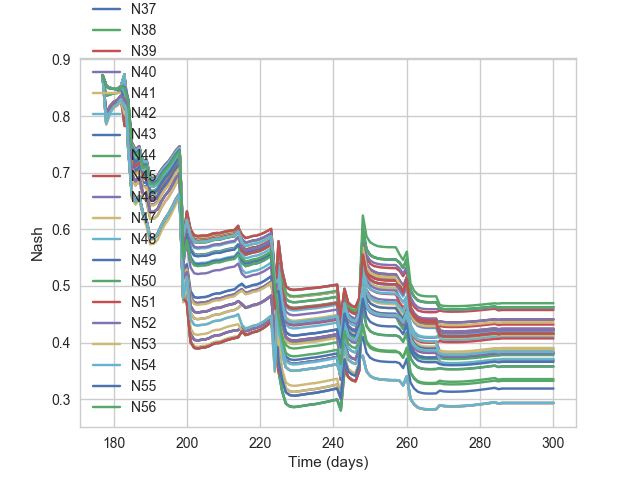

In [12]:
start = 1
n_mods = n_tests + 1

fig, ax1 = plt.subplots()
time = data.iloc[:, 0]
legend = []

for i in range(start, n_mods):
    l = "N" + str(i)
    legend.append(l)
for i in range(1, n_mods):
    ax1.plot(time, data.iloc[:, i], label=legend[i-start])
ylabel = 'Nash'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel(ylabel)
# plt.legend(loc='upper right', bbox_to_anchor=(1., 1), ncol=4, shadow=True, fancybox=True)
plt.legend(loc=4, mode='expand', ncol=1, shadow=True, fancybox=True)
plt.show()

## Plotting discharge 

**Observations = "obs"**

**Decreases** in lateral flow and **increases** in percolation potential improve nash coefficients. 

In [52]:
obs.head()

,DayMoYr,Date,Jdays,VolTot.L,ConSmOut_ugL.blk,ConSmOut_ugL.sd,ConOxOut_ugL.blk,ConOxOut_ugL.sd,ConEsOut_ugL.blk,ConEsOut_ugL.sd,deltaOut.blk,deltaOut.sd,SubWeeks
0,2015-10-01,01/10/2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-10-02,02/10/2015,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-10-03,03/10/2015,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-10-04,04/10/2015,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-10-05,05/10/2015,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Edit observations (select relevant columns)
obs['DayMoYr'] = pd.to_datetime(obs['DayMoYr'])  # Convert to Date object
obs = obs[['DayMoYr', 'Jdays', 'VolTot.L']]  # keep desired columns
obs['Q_obs.m3'] = obs['VolTot.L'] * 1 / 10 ** 3

# def liters_to_m3(row):
#     val = row['VolTot.L'] * 1 / 10 ** 3
#     return val

# obs['Q_obs.m3'] = obs.apply(liters_to_m3, axis=1)

C:\Users\pablo\AppData\Local\Continuum\Anaconda3\envs\Python27-PyCharm\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Import simulated data 

**Folder = Model run **

In [69]:
folder = "2"

# Simulated Start time
yy = 2015
mm = 10
dd = 1
dt = datetime.date(yy, mm, dd)

### Daily components

In [70]:
# Lateral FLow
oLF = pd.read_table(sim_path + folder + back + "res_o_accuLatflow_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'oLF.m3'],
                         header=None)


# Runoff
ro = pd.read_table(sim_path + folder + back + "res_accuRunoff_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'RO.m3'],
                         header=None)

# Drainage
dr = pd.read_table(sim_path + folder + back + "res_o_accuDrain_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'iLF.m3'],
                         header=None)

# Deep percolation
dp = pd.read_table(sim_path + folder + back + "res_accuPercol_z2_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'DP.m3'],
                         header=None)
#ETP
etp = pd.read_table(sim_path + folder + back + "res_accuEtp_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'ETP.m3'],
                         header=None)

# Baseflow
bf = pd.read_table(sim_path + folder + back + "res_accuBaseflow_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'BF.m3'],
                         header=None)

# Q-sim
nq_sim = pd.read_table(sim_path + folder + back +  "res_n_accuVol_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'iQ.m3'],
                         header=None) 

rain = pd.read_table(sim_path + folder + back + "res_accuRain_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'Rain.m3'],
                         header=None) 

# Storage
store = pd.read_table(sim_path + folder + back + "res_accuStorage_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'ST.m3'],
                         header=None)


components = [oLF, ro, dr, dp, etp, bf, store, nq_sim, obs, rain]


In [71]:
components[4].tail()

,dt,ETP.m3
275,276,2217.09
276,277,2231.28
277,278,1931.72
278,279,1647.89
279,280,1580.91


In [72]:
window = []
for i in components:
    c = i[160:280]
    window.append(c)
# nLF = nLF[160:300]
# nLF.head()

<IPython.core.display.Javascript object>


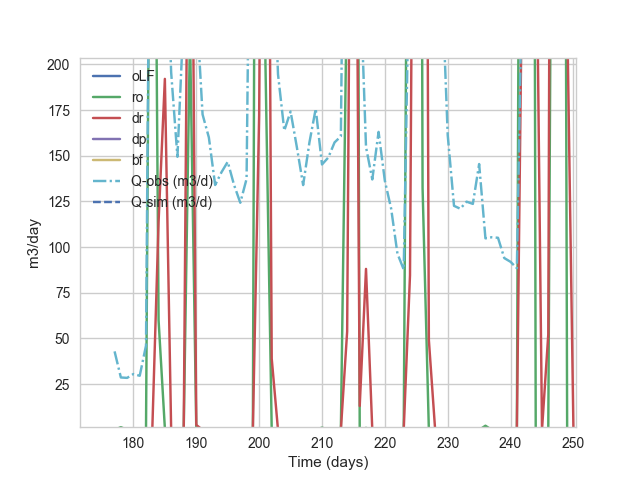

In [73]:

fig, ax1 = plt.subplots()
time = window[0].iloc[:, 0]
oLF = window[0].iloc[:, 1]
ro = window[1].iloc[:, 1]
dr = window[2].iloc[:, 1]
dp = window[3].iloc[:, 1]
etp = window[4].iloc[:, 1]
bf = window[5].iloc[:, 1]
sto = window[6].iloc[:, 1]

rain_vol = window[-1].iloc[:, 1]
obs_vol = window[-2].iloc[:, 3]
sim_vol = window[-3].iloc[:, 1]


legend = ["oLF", "ro", "dr", "dp", "etp", "bf", "sto", "Q-sim (m3/d)", "Q-obs (m3/d)", "Rain (m3/d)"]

ax1.plot(time, oLF, label=legend[0])
ax1.plot(time, ro, label=legend[1])
ax1.plot(time, dr, label=legend[2])
ax1.plot(time, dp, label=legend[3])

ax1.plot(time, bf, label=legend[5])

#ax1.plot(time, rain_vol, linestyle='dotted', label=legend[-1])
ax1.plot(time, obs_vol, linestyle='dashdot', label=legend[-2])
ax1.plot(time, sim_vol, linestyle='dashed', label=legend[-3])


# ax1.plot(time, sim_vol, linestyle='dashdot', label=legend[1])
ylabel = 'm3/day'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel(ylabel)
# plt.legend(loc='right', bbox_to_anchor=(1.15, .8), ncol=1, shadow=True, fancybox=True)
plt.legend(loc=1, mode='expand', ncol=1, shadow=True, fancybox=True)
plt.show()

1. Problem appears to be that the basin is not filling up quickly enough (lateral flow discharge - red).

We could treat this by:
- Decreasing ETP
- Moving run-off to recharge (Paul's Ksat)
- Keeping dDP = 0 (avoids calibration of z2's drainage coefficient.

2. 

<IPython.core.display.Javascript object>


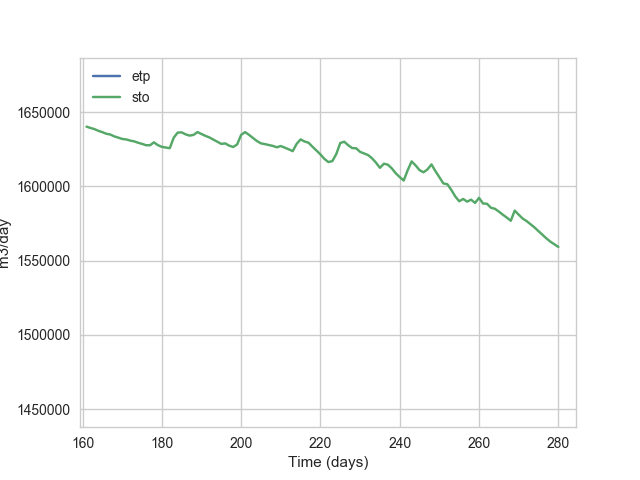

In [44]:
fig, ax1 = plt.subplots()
time = window[0].iloc[:, 0]

ax1.plot(time, etp, label=legend[4])
ax1.plot(time, sto, label=legend[5])
ylabel = 'm3/day'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel(ylabel)
# plt.legend(loc='right', bbox_to_anchor=(1.15, .8), ncol=1, shadow=True, fancybox=True)
plt.legend(loc=1, mode='expand', ncol=1, shadow=True, fancybox=True)
plt.show()

In [15]:
import math as m
d1 = 1
s1 = 1
ksat = 43 # mm/d
# tau (percolation factor):
.0866*m.exp(d1*m.log10(s1*ksat))

0.4435312542793867

In [16]:
# Paul's Ksat values top-up Tau at 1
ksat = 279  
.0866*m.exp(s1*m.log10(s1*ksat))

0.9991491020789747

In [17]:
# Model's implementation:
# day 81 = 781 mm/day
ksat = 781
min(.0866*m.exp(s1*m.log10(s1*ksat)), 1)

1

### Total water

In [18]:
# Lateral FLow
iLF_sum = pd.read_table(sim_path + folder + back + "res_i_totLatflow_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'iLF.m3'],
                         header=None)

oLF_sum = pd.read_table(sim_path + folder + back + "res_o_totLatflow_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'oLF.m3'],
                         header=None)

nLF_sum = pd.read_table(sim_path + folder + back + "res_n_totLatflow_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'nLF.m3'],
                         header=None)

# Runoff
ro_sum = pd.read_table(sim_path + folder + back + "res_totRunoff_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'RO.m3'],
                         header=None)

# Drainage
dr_sum = pd.read_table(sim_path + folder + back + "res_o_totDrain_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'iLF.m3'],
                         header=None)

# Deep percolation
dp_sum = pd.read_table(sim_path + folder + back + "res_totPercol_z2_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'DP.m3'],
                         header=None)

etp_sum = pd.read_table(sim_path + folder + back + "res_totEtp_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'etp.m3'],
                         header=None)

# Tot Discharge
q_i_sum = iLF_sum.merge(ro_sum, left_on='dt', right_on='dt', how='outer')
q_i_sum['q_i_sum'] = q_i_sum['iLF.m3'] + q_i_sum['RO.m3']
q_i_sum = q_i_sum.drop(['iLF.m3', 'RO.m3'], axis=1)

q_n_sum = pd.read_table(sim_path + folder + back + "res_q_sim_tot_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'q_sim.m3'],
                         header=None)

tot_obs = pd.read_table(sim_path + folder + back + "res_q_obs_tot_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'q_obs.m3'],
                         header=None)



totcomp = [iLF_sum, oLF_sum, nLF_sum, ro_sum, dr_sum, dp_sum, etp_sum, q_i_sum, q_n_sum, tot_obs]

tot_window = []
for i in totcomp:
    c = i[160:280]
    tot_window.append(c)
    

In [19]:
tot_window[8].head()

,dt,q_sim.m3
160,161,0.0
161,162,0.0
162,163,0.0
163,164,0.0
164,165,0.0


<IPython.core.display.Javascript object>


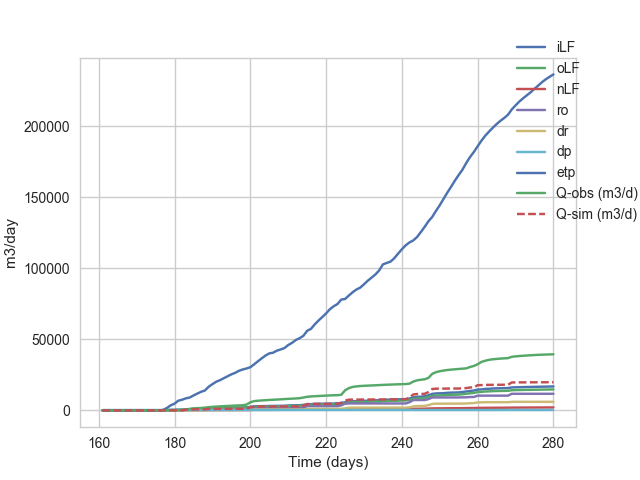

In [20]:
# components = [iLF, oLF, nLF, ro, dp, etp, iq_sim, nq_sim, obs]
fig, ax1 = plt.subplots()
time = tot_window[0].iloc[:, 0]
iLF = tot_window[0].iloc[:, 1]
oLF = tot_window[1].iloc[:, 1]
nLF = tot_window[2].iloc[:, 1]
ro = tot_window[3].iloc[:, 1]
dr = tot_window[4].iloc[:, 1]
dp = tot_window[5].iloc[:, 1]
etp = tot_window[6].iloc[:, 1]

sim_in_vol = tot_window[-3].iloc[:, 1]
sim_vol = tot_window[-2].iloc[:, 1]
obs_vol = tot_window[-1].iloc[:, 1]


legend = ["iLF", "oLF", "nLF", "ro", "dr", "dp", "etp", "Qin", "Q-sim (m3/d)", "Q-obs (m3/d)"]

ax1.plot(time, iLF, label=legend[0])
ax1.plot(time, oLF, label=legend[1])
ax1.plot(time, nLF, label=legend[2])
ax1.plot(time, ro, label=legend[3])
ax1.plot(time, dr, label=legend[4])
ax1.plot(time, dp, label=legend[5])
ax1.plot(time, etp, label=legend[6])

ax1.plot(time, obs_vol, label=legend[-1])
ax1.plot(time, sim_vol,  linestyle='dashed', label=legend[-2])
# ax1.plot(time, sim_vol, linestyle='dashdot', label=legend[1])
ylabel = 'm3/day'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel(ylabel)
plt.legend(loc='right', bbox_to_anchor=(1.15, .8), ncol=1, shadow=True, fancybox=True)
plt.show()

## Observations

Simulated disch is stil at half observed output. Likely due to:
- High evapotranspiration ...or 
- insufficient artificial drainage (so increase c_adr progressively)
- No outlet cell output considered (to include with all connected ditches)

TODO:
- Document isotope logic
- Check first reactive simulations

